Used tutorials:
- https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# import shap
# import gc

# from lightgbm import LGBMClassifier
# import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
warnings.simplefilter(action='ignore', category=FutureWarning)


for dirname, _, filenames in os.walk('/compas_archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
# import pandas as pd
# compas_scores_raw = pd.read_csv("compas_archive/compas-scores-raw.csv")
# cox_violent_parsed = pd.read_csv("compas_archive/cox-violent-parsed.csv")
# cox_violent_parsed_filt = pd.read_csv("compas_archive/cox-violent-parsed_filt.csv")

In [10]:
TARGET_COL = "Two_yr_Recidivism"

In [71]:
df = pd.read_csv("compas_archive/propublicaCompassRecividism_data_fairml.csv/propublica_data_for_fairml.csv")

print(df.shape)
display(df.columns)

(6172, 12)


Index(['Two_yr_Recidivism', 'Number_of_Priors', 'score_factor',
       'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American',
       'Asian', 'Hispanic', 'Native_American', 'Other', 'Female',
       'Misdemeanor'],
      dtype='object')

In [53]:
X = df.drop([TARGET_COL],axis=1)
y = df[TARGET_COL]

In [74]:
# Splitting X and y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y)


In [82]:
# Training a RandomForest Classifier 
# model = RandomForestClassifier()
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtaining predictions
y_hat = model.predict(X_test)
len(y_hat)

1852

In [84]:
# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted_class'] = y_hat.tolist()
predictions_col = predictions_col.set_index(X_test.index)
predictions_col['true_class'] = y_test

# Calculating the errors with the absolute value
predictions_col['errors'] = abs(predictions_col['predicted_class'] - predictions_col['true_class'])


# Rescaling the prediction errors with max error value of 1
# It doesn't matter whether the misclassification is between class 0 and 2 or between 0 and 1, it has the same error value. 
predictions_col['errors'] = predictions_col['errors'].replace(2.0, 1.0)
# print(len(predictions_col['errors'] ))

# Adding predictions to test data
entire_dataset = X_test.merge(predictions_col, how='outer', left_index = True, right_index = True)


errors = entire_dataset['errors']
df_out = entire_dataset.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# The dataset
print(len(entire_dataset))
entire_dataset[entire_dataset['errors']==1]

1852


Number_of_Priors  score_factor  Age_Above_FourtyFive  \
1004                 3             0                     0   
3540                 0             0                     1   
1968                 1             0                     1   
4851                 2             1                     0   
5874                 1             0                     0   
...                ...           ...                   ...   
2216                14             1                     1   
5475                 1             0                     0   
1528                 6             0                     1   
1567                 4             0                     0   
2690                10             0                     0   

      Age_Below_TwentyFive  African_American  Asian  Hispanic  \
1004                     0                 0      0         0   
3540                     0                 1      0         0   
1968                     0                 0      0         1   
4851                     1                 1      0         0   
5874                     0                 0      0         1   
...                    ...               ...    ...       ...   
2216                     0                 1      0         0   
5475                     1                 1      0         0   
1528                     0                 0      0         0   
1567                     0                 0      0         0   
2690                     0                 0      0         0   

      Native_American  Other  Female  Misdemeanor  predicted_class  \
1004                0      0       1            1                1   
3540                0      0       0            0                0   
1968                0      0       0            0                0   
4851                0      0       1            0                1   
5874                0      0       0            0                0   
...               ...    ...     ...          ...              ...   
2216                0      0       0            0                0   
5475                0      0       1            0                0   
1528                0      0       0            0                0   
1567                0      0       0            1                0   
2690                0      0       0            1                1   

      true_class  errors  
1004           0       1  
3540           1       1  
1968           1       1  
4851           0       1  
5874           1       1  
...          ...     ...  
2216           1       1  
5475           1       1  
1528           1       1  
1567           1       1  
2690           0       1  

[617 rows x 14 columns]

In [66]:
errors = len(entire_dataset.loc[entire_dataset['errors']==1])
correct = len(entire_dataset.loc[entire_dataset['errors']==0])

print(correct)
print(errors)

print(accuracy_score(y_test,y_hat))

123
137
0.6785425101214575


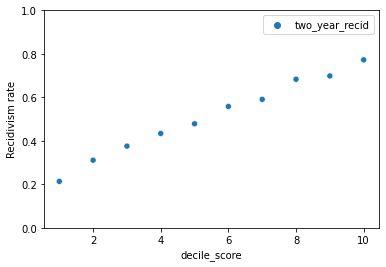

In [11]:

d = df.groupby('decile_score').agg({'two_year_recid': 'mean'})
# plot
sns.scatterplot(data=d);
plt.ylim(0,1);
plt.ylabel('Recidivism rate');

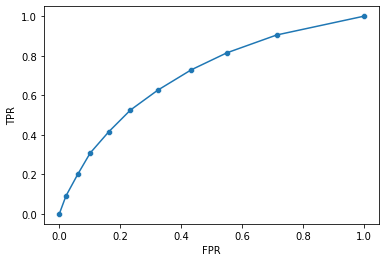

In [12]:

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");

In [73]:
entire_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1153 to 66
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number_of_Priors      260 non-null    int64  
 1   score_factor          260 non-null    int64  
 2   Age_Above_FourtyFive  260 non-null    int64  
 3   Age_Below_TwentyFive  260 non-null    int64  
 4   African_American      260 non-null    int64  
 5   Asian                 260 non-null    int64  
 6   Hispanic              260 non-null    int64  
 7   Native_American       260 non-null    int64  
 8   Other                 260 non-null    int64  
 9   Female                260 non-null    int64  
 10  Misdemeanor           260 non-null    int64  
 11  predicted_class       260 non-null    int64  
 12  true_class            260 non-null    float64
 13  errors                260 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 30.5 KB


In [85]:
# Exporting the preprocessed dataset
import os
path = r'..\\Preprocessed_datasets\\'
entire_dataset.to_csv(os.path.join(path, r'final_preprocessed_compas.csv'))

